In [2]:
from neural_engine.nn import MLP, mse_loss, Layer
from tensorflow import keras
import numpy as np
import io
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

5


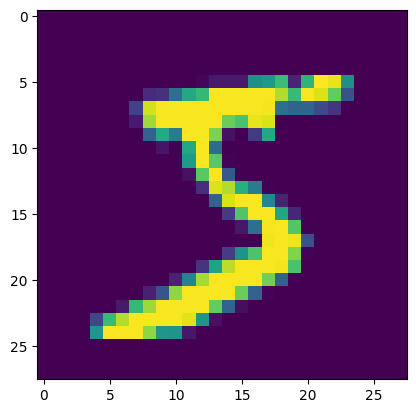

In [3]:

plt.imshow(X_train[0]) # 2D list of grayscale values ranging between 0-255 array of 28*28 = 784
print(y_train[0]) # expected output

In [4]:
flat_x_train = [[x/255 for row in mat for x in row] for mat in X_train]

In [5]:
l1 = Layer(nin=784,nout=128, act_type='relu', name='layer 1')
l2 = Layer(nin=128, nout=32, act_type='relu', name='layer 2')
l3 = Layer(nin=32, nout=10, act_type='sigmoid', name='layer 3')

model = MLP(layers=[l1,l2,l3])#initialize model


In [41]:
def train_model(xs_batch:list[list[np.int8]], ys_batch:[np.int8]):
    # forward propagation
    ypred_batch = [model(xs) for xs in xs_batch]
    # print(ypred)
    # calculating loss
    loss = sum(mse_loss(ys, ypred) for ys, ypred in zip(ys_batch, ypred_batch))

    for param in model.parameters():
        param.grad = 0

    # backward propagation
    loss.backward()

    # changing parameters based on gradients
    for param in model.parameters():
        param.data += -0.05*param.grad

    return loss

In [ ]:
batch_size = 25
mini_batches = [
    [flat_x_train[i:i+batch_size], y_train[i:i+batch_size]]
    for i in range(0, len(y_train), batch_size)
]
print(f'total batches={len(mini_batches)}')

for idx,batch in enumerate(mini_batches):
    y_exp = [[1 if i==y else 0 for i in range(10)] for y in batch[1]]
    loss = train_model( batch[0], y_exp)
    print(f'{idx} loss = {loss.data} number={batch[1]}')

total batches=25
0 loss = 204.59371012109324 number=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]
1 loss = 197.35595010350835 number=[2 4 3 2 7 3 8 6 9 0 5 6 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [ ]:
fitting = 0
for exp_num, img in zip(y_test, X_test):
    res = model([p/255 for row in img for p in row])
    print(res)
    res_num = max(range(len(res)), key=lambda i: res[i].data)
    fitting = fitting+1 if res_num==exp_num else fitting
    print(exp_num, res_num)

print(f'success rate: {fitting/len(y_test) * 100}%')